In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import re
import string

In [3]:
cd ..

/data/nasif12/home_if12/chengju/project/news


In [125]:
fkn = pd.read_pickle("./data/fkn.gzip")

In [126]:
fkn.head()

,index,title,text,label
0,8476,"[you, can, smell, hillari, fear]","[daniel, greenfield, shillman, journal, fellow...",1
1,10294,"[watch, the, exact, moment, paul, ryan, commit...","[googl, pinterest, digg, linkedin, reddit, stu...",1
2,3608,"[kerri, go, pari, gestur, sympathi]","[us, secretari, state, john, f, kerri, said, m...",0
3,10142,"[berni, support, twitter, erupt, anger, dnc, w...","[—, kayde, king, kaydeek, novemb, 9, 2016, the...",1
4,875,"[the, battl, new, york, whi, this, primari, ma...","[it, primari, day, new, york, frontrunn, hilla...",0


## Clean text data

## Pickle the output

In [111]:
#fkn.to_pickle("./data/fkn.gzip")

## Train validation test split

In [127]:
import numpy as np
import pandas as pd

def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.ix[perm[:train_end]]
    validate = df.ix[perm[train_end:validate_end]]
    test = df.ix[perm[validate_end:]]
    return train, validate, test

In [128]:
train_dt, validate_dt, test_dt = train_validate_test_split(fkn)

In [129]:
print("training shape", train_dt.shape)
print("validating shape", validate_dt.shape)
print("testing shape", test_dt.shape)

training shape (3801, 4)
validating shape (1267, 4)
testing shape (1267, 4)


## tf-idf of text body

In [130]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [131]:
" ".join(fkn["title"][0])

'you can smell hillari fear'

In [132]:
train_dt["text"] = train_dt["text"].apply(lambda x: " ".join(x))

In [133]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_dt.text)
X_train_counts.shape

(3801, 48985)

In [134]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
y_train = train_dt["label"].as_matrix()

In [135]:
validate_dt["text"] = validate_dt["text"].apply(lambda x: " ".join(x))

In [136]:
X_val_counts = count_vect.transform(validate_dt.text)
X_val_tfidf = tfidf_transformer.transform(X_val_counts)
y_val = validate_dt["label"].as_matrix()

In [137]:
test_dt["text"] = test_dt["text"].apply(lambda x: " ".join(x))

In [138]:
X_test_counts = count_vect.transform(test_dt.text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_test = test_dt["label"].as_matrix()

In [139]:
X_train_tfidf.shape

(3801, 48985)

(array([  2.84000000e+03,   7.69000000e+02,   1.11000000e+02,
          4.50000000e+01,   2.20000000e+01,   5.00000000e+00,
          3.00000000e+00,   4.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([    0. ,   601.6,  1203.2,  1804.8,  2406.4,  3008. ,  3609.6,
         4211.2,  4812.8,  5414.4,  6016. ]),
 <a list of 10 Patch objects>)

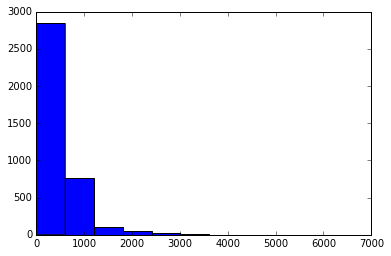

In [140]:
# Document lenght
plt.hist(X_train_counts.sum(1))

In [57]:
from src.helper import save_sparse_csr

In [58]:
save_sparse_csr("./data/X_train_tfidf", X_train_tfidf)
save_sparse_csr("./data/X_val_tfidf", X_val_tfidf)
save_sparse_csr("./data/X_test_tfidf", X_test_tfidf)

In [59]:
np.save("./data/y_train", y_train)
np.save("./data/y_val", y_val)
np.save("./data/y_test", y_test)

In [144]:
# X_train_tfidf = load_sparse_csr("./data/X_train_tfidf.npz")
# X_val_tfidf = load_sparse_csr("./data/X_val_tfidf.npz")
# X_test_tfidf = load_sparse_csr("./data/X_test_tfidf.npz")

In [141]:
X_train_counts.sum(0)[X_train_counts.sum(0) == 3]

matrix([[3, 3, 3, ..., 3, 3, 3]], dtype=int64)

## world could 

In [142]:
fkn1 = fkn[fkn["label"] == 1]
texts = fkn1["text"]
texts = texts.apply(lambda x: " ".join(x))

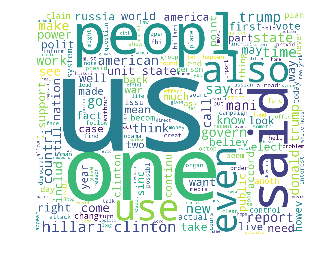

In [143]:
from wordcloud import WordCloud, STOPWORDS

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(texts))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

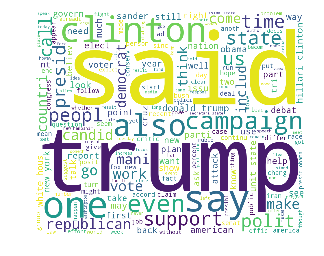

In [144]:
fkn1 = fkn[fkn["label"] == 0]
texts = fkn1["text"]
texts = texts.apply(lambda x: " ".join(x))
wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(texts))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [145]:
fkn.head(10)

,index,title,text,label
0,8476,"[you, can, smell, hillari, fear]","[daniel, greenfield, shillman, journal, fellow...",1
1,10294,"[watch, the, exact, moment, paul, ryan, commit...","[googl, pinterest, digg, linkedin, reddit, stu...",1
2,3608,"[kerri, go, pari, gestur, sympathi]","[us, secretari, state, john, f, kerri, said, m...",0
3,10142,"[berni, support, twitter, erupt, anger, dnc, w...","[—, kayde, king, kaydeek, novemb, 9, 2016, the...",1
4,875,"[the, battl, new, york, whi, this, primari, ma...","[it, primari, day, new, york, frontrunn, hilla...",0
5,6903,"[tehran, usa]","[i'm, immigr, grandpar, more, 50, year, ago, a...",1
6,7341,"[girl, horrifi, at, what, she, watch, boyfrien...","[share, this, bayle, luciani, left, screenshot...",1
7,95,"[britain, schindler, die, 106]","[a, czech, stockbrok, save, 650, jewish, child...",0
8,4869,"[fact, check, trump, clinton, commanderinchief...","[hillari, clinton, donald, trump, made, inaccu...",0
9,2909,"[iran, report, make, new, push, uranium, conce...","[iranian, negoti, report, made, lastditch, pus...",0


## visulize naive bayes result

BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions:

In [146]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

In [167]:
train_dt["text"][:2]

834       a verdict 2017 could sweep consequ tech startup
3861    govern govern corrupt obama expos sleuth journ...
Name: text, dtype: object

In [296]:
train_dt, validate_dt, test_dt = train_validate_test_split(fkn, train_percent=.79,seed=8888)

In [297]:
train_dt["text"] = train_dt["text"].apply(lambda x: " ".join(x))
count_vect = CountVectorizer(min_df=1)
X_train_counts = count_vect.fit_transform(train_dt.text)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

y_train = train_dt["label"].as_matrix()
validate_dt["text"] = validate_dt["text"].apply(lambda x: " ".join(x))

X_val_counts = count_vect.transform(validate_dt.text)
X_val_tfidf = tfidf_transformer.transform(X_val_counts)
y_val = validate_dt["label"].as_matrix()

# test_dt["text"] = test_dt["text"].apply(lambda x: " ".join(x))

# X_test_counts = count_vect.transform(test_dt.text)
# X_test_tfidf = tfidf_transformer.transform(X_test_counts)
# y_test = test_dt["label"].as_matrix()

In [298]:
t_y = y_train - y_train.mean()
t_x = X_train_counts - X_train_counts.mean(axis=0)
#/[X_train_counts>0].sum(axis=0)

In [299]:
print(t_x.shape)
print(t_y.shape)
covXY = np.dot(t_x.T,t_y.reshape(-1))/(X_train_counts).sum(axis=0)

(5004, 57932)
(5004,)


In [300]:
g, binedge = np.histogram(np.squeeze(np.asarray(covXY)),bins = 10,range=(-.00005, .00001))
print(g)
print(binedge*1e5)

[0 0 0 0 0 0 0 0 0 0]
[-5.  -4.4 -3.8 -3.2 -2.6 -2.  -1.4 -0.8 -0.2  0.4  1. ]


In [301]:
def BernoulliNB_sum(X_tr, y_tr, X_v,y_v, alpha=1.0, plotROC = False):
    clf = BernoulliNB(alpha)
    clf.fit(X_tr, y_tr)
    predict_train = clf.predict(X_tr)
    precision_train, recall_train, _ = metrics.precision_recall_curve(y_tr, predict_train)

    
    predict_val = clf.predict(X_v)
    precision_val, recall_val, _ = metrics.precision_recall_curve(y_v, predict_val)
    
    fpr_train, tpr_train, thresholds = metrics.roc_curve(y_tr, predict_train)
    fpr_val, tpr_val, thresholds = metrics.roc_curve(y_v, predict_val)

    prd_tr = metrics.accuracy_score(y_tr, predict_train) # metrics.auc(fpr_train, tpr_train)
    prd_v = metrics.accuracy_score(y_v, predict_val)# metrics.auc(fpr_val, tpr_val)
    
    if plotROC:
        print("performance for the training data")
        print(metrics.classification_report(y_tr, predict_train))
        print("performance for the test data")
        print(metrics.classification_report(y_v, predict_val))

        
        plt.plot(fpr_train, tpr_train,
                label='Training ROC curve (area = %0.2f)' % auc_train)
        plt.plot(fpr_val, tpr_val, 
                label='Validation ROC curve (area = %0.2f)' % auc_val)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title("ROC curve")
        plt.legend(loc='lower right')
        plt.show()
    return prd_tr,prd_v
prd_tr,prd_v = BernoulliNB_sum(X_train_counts, y_train, X_val_counts,y_val)

In [302]:
prd_e = np.zeros((10,2))
alphas = np.random.rand(10)
alpha_scale = 7
alphas = (np.sort(alphas)*alpha_scale) - alpha_scale
# alpha_scale
print(alphas.T)

[-6.78736419 -6.76974978 -6.23121607 -4.97029569 -4.82278905 -4.48773249
 -2.59156018 -1.69575235 -0.57959568 -0.57817088]


[-6.78736419 -6.76974978 -6.23121607 -4.97029569 -4.82278905 -4.48773249
 -2.59156018 -1.69575235 -0.57959568 -0.57817088]
5e-06


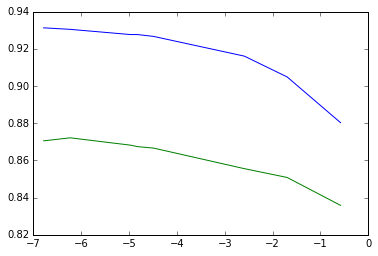

In [303]:
for i in np.arange(10):
    prd_e[i,0],prd_e[i,1] = BernoulliNB_sum(X_train_counts, y_train, X_val_counts,y_val, alpha= 10**alphas[i])
plt.plot(alphas, prd_e)
print(alphas)
alpha = 5e-6
print(alpha)

[-8.94310613 -8.82620602 -5.87246045 -5.61554486 -5.39677007 -4.67151909
 -3.70337378 -3.52452294 -0.83562437 -0.69347021]


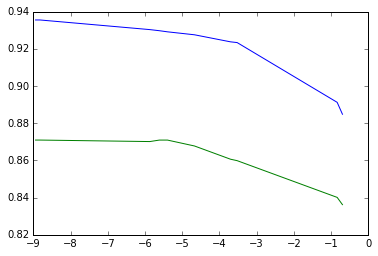

In [271]:
plt.hist(np.maximum(X_train_counts))

In [306]:
from time import time
from sklearn import manifold
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

t0 = time()
tsne = manifold.TSNE(n_components=2 , init='pca', random_state=0)
Y = tsne.fit_transform(X_train_counts)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

TypeError: A sparse matrix was passed, but dense data is required for method="barnes_hut". Use X.toarray() to convert to a dense numpy array if the array is small enough for it to fit in memory. Otherwise consider dimensionality reduction techniques (e.g. TruncatedSVD)